<a href="https://colab.research.google.com/github/sazolfaghari/Tutorial/blob/main/Cryptocurrency_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycoingecko

In [36]:
from pycoingecko import CoinGeckoAPI
import pandas as pd
import io
import os
cg = CoinGeckoAPI()
which_coin = str(input("Please enter the coin you want to see the price of: "))
currency = str(input("Please enter your preferred currency:"))
print(cg.get_price(ids=which_coin, vs_currencies= currency))
coin_data = cg.get_coin_market_chart_by_id(id=which_coin, vs_currency=currency, days=30)

coin_data

Please enter the coin you want to see the price of: solana
Please enter your preferred currency:usd
{'solana': {'usd': 204.78}}


{'prices': [[1752573864009, 159.3912600299821],
  [1752577421202, 159.57335246527037],
  [1752581032835, 159.7515753774065],
  [1752584608962, 159.84528061436401],
  [1752588238858, 161.48027595193906],
  [1752591699315, 158.69998126453444],
  [1752595424789, 159.90303954497278],
  [1752599010393, 161.07990501042224],
  [1752602632223, 162.49541898888728],
  [1752606257058, 162.0233460474161],
  [1752609817494, 160.29944696070646],
  [1752613387954, 160.9020858696727],
  [1752617038114, 162.04584792496817],
  [1752620477617, 162.2227842360718],
  [1752624175776, 163.98907873743036],
  [1752627838222, 164.75146703892074],
  [1752631436522, 164.00638603080404],
  [1752634880448, 162.11315276183515],
  [1752638650337, 162.6056400065343],
  [1752642273721, 162.55853708820698],
  [1752645838149, 163.29118016381182],
  [1752649425992, 163.97953292752405],
  [1752653025339, 164.2937932763039],
  [1752656641825, 165.28688513787236],
  [1752660233643, 167.03845227458348],
  [1752663867741, 166.

In [37]:
data = pd.DataFrame(coin_data['prices'], columns=["Timestamp", "Price"])
data['Date'] = pd.to_datetime(data['Timestamp'], unit='ms')
data

,Timestamp,Price,Date
0,1752573864009,159.391260,2025-07-15 10:04:24.009
1,1752577421202,159.573352,2025-07-15 11:03:41.202
2,1752581032835,159.751575,2025-07-15 12:03:52.835
3,1752584608962,159.845281,2025-07-15 13:03:28.962
4,1752588238858,161.480276,2025-07-15 14:03:58.858
...,...,...,...
717,1755151489977,206.817847,2025-08-14 06:04:49.977
718,1755154907512,207.706360,2025-08-14 07:01:47.512
719,1755158995868,205.739489,2025-08-14 08:09:55.868
720,1755162544063,203.753200,2025-08-14 09:09:04.063


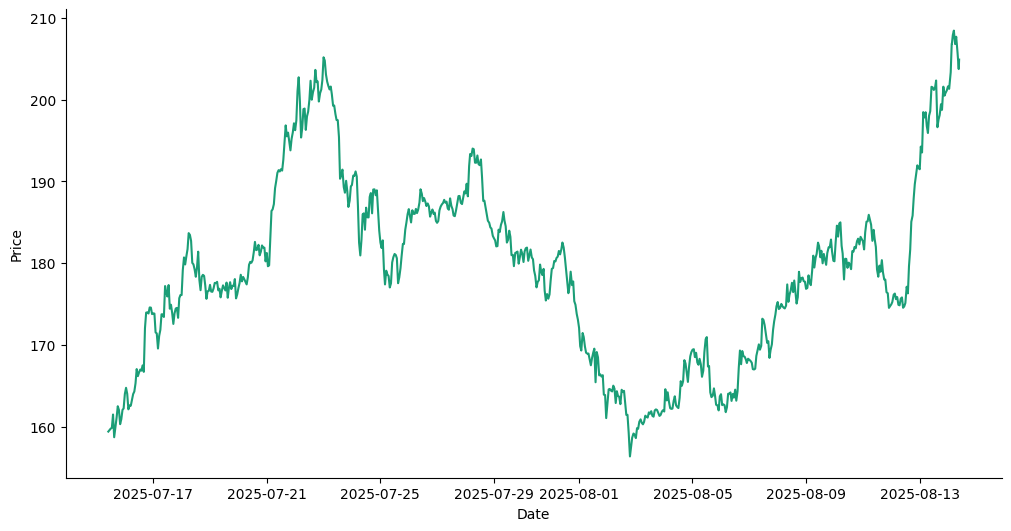

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Price')

In [39]:
candlestick_data = data.groupby(data.Date.dt.date).agg({"Price" : ["min", "max", "first", "last"]})
candlestick_data

Price                                    
                   min         max       first        last
Date                                                      
2025-07-15  158.699981  162.495419  159.391260  162.222784
2025-07-16  162.113153  174.582437  163.989079  173.766875
2025-07-17  169.555629  177.320661  173.865909  176.101785
2025-07-18  175.639129  183.676787  176.097645  176.615047
2025-07-19  175.687364  178.051298  177.347175  176.186708
2025-07-20  176.938049  182.602608  176.938049  180.220222
2025-07-21  179.623728  197.116484  181.246989  197.116484
2025-07-22  195.376047  203.652665  196.273033  202.392214
2025-07-23  186.884807  205.194266  205.194266  189.394757
2025-07-24  180.946246  191.224505  189.565890  183.970470
2025-07-25  177.025085  186.008679  182.527269  186.008679
2025-07-26  184.984186  189.043395  186.617125  185.167139
2025-07-27  184.939584  188.782649  184.939584  188.782649
2025-07-28  183.349946  194.024493  188.532696  183.349946
2025-07-29  179.634425  186.257249  183.075612  181.649800
2025-07-30  175.434195  181.907779  181.167765  176.178839
2025-07-31  173.092068  182.527081  177.809679  173.092068
2025-08-01  161.042355  172.077221  172.077221  161.042355
2025-08-02  156.351150  165.011368  162.746073  159.005029
2025-08-03  158.594507  162.104355  158.594507  162.011578
2025-08-04  161.847030  169.105143  161.847030  169.105143
2025-08-05  161.986295  170.954753  169.415220  163.701863
2025-08-06  161.768148  169.311878  163.966633  168.307398
2025-08-07  166.989416  174.729092  168.173196  174.729092
2025-08-08  174.387989  178.945070  175.245362  177.740548
2025-08-09  176.859947  182.891235  176.859947  180.300043
2025-08-10  178.007091  184.992299  180.231209  182.996974
2025-08-11  174.528806  185.918937  182.689286  174.761205
2025-08-12  174.543061  191.970825  174.967328  191.642829
2025-08-13  191.492955  202.351429  191.492955  201.152922
2025-08-14  201.334110  208.456560  201.634660  204.911317

In [42]:
import plotly
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = candlestick_data.index,
                                                       open = candlestick_data['Price']['first'],
                                                       high =candlestick_data['Price']['max'],
                                                       low =candlestick_data['Price']['min'],
                                                       close =candlestick_data['Price']['last'])])
fig.update_layout(xaxis_rangeslider_visible=False, xaxis_title = "Date", yaxis_title ='Price ('+currency+')',title = which_coin.upper() +' Candlestick over the past 30 days.')
fig.show()
#plotly.offline.plot(fig, filename='./'+which_coin+'_candlestick_graph.html', auto_open=False)